In [1]:
# importing all the necessary library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the training data set using the pandas library
data = pd.read_csv(r'C:\ABB\train_v9rqX0R.csv')
data.head(4) # checking the top 4 rowo of the dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800


In [3]:
# checking the rows and columns of the dataset
data.shape

(8523, 12)

In [4]:
data.describe() # to understand the numeric columns of the dataset

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
# now lets check for the null values present in the dataset
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
'''Now we will fill the null values with the mean values because mean values will not introduce any significant bias to the dataset and will
help maintain the overall distribution of the data, ensuring a more accurate analysis or better model performance.'''
data.fillna({"Item_Weight":12.85,"Outlet_Size":"Medium"},inplace=True)
data.isnull().sum() # now our data set has no null values.

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

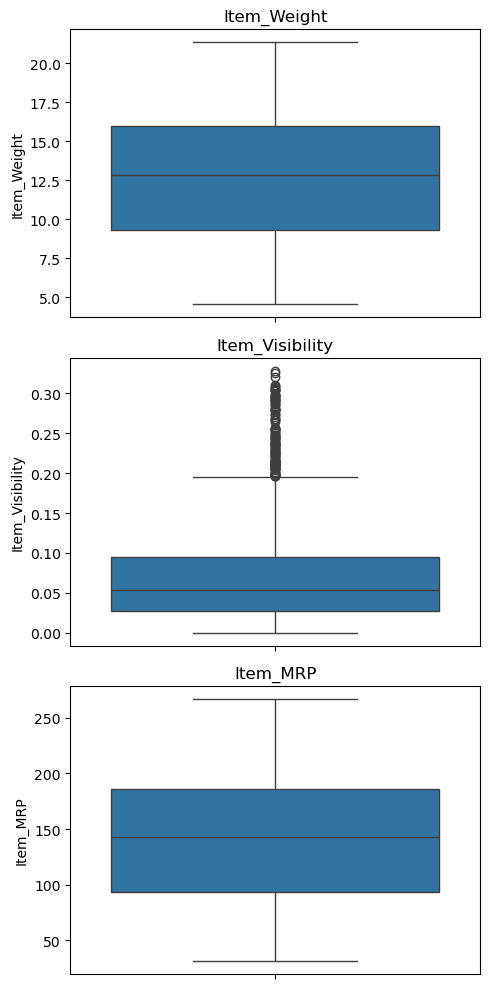

In [7]:
# now lets check for the outliers using boxplot

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(5, 10))

# Plot each boxplot
sns.boxplot(y=data["Item_Weight"], ax=axes[0])
axes[0].set_title("Item_Weight")

sns.boxplot(y=data["Item_Visibility"], ax=axes[1])
axes[1].set_title("Item_Visibility")

sns.boxplot(y=data["Item_MRP"], ax=axes[2])
axes[2].set_title("Item_MRP")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# as we can see "weekly_sales" and "unemployment" column has some outliers

In [8]:
# now we will remove the outliers present in the Item_Visibility to normalize the data using IQR.
Q3,Q1 = data["Item_Visibility"].quantile([.75,.25])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR) # LowerLimit
UL = Q3 + 1.5*(IQR) # UpperLimit
data["Item_Visibility"]=np.where(data["Item_Visibility"]>UL,UL,data["Item_Visibility"]) # through this code we are removing the outliers with the upperlimit

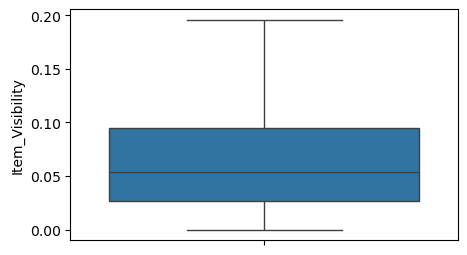

In [9]:
# Now lets check that the outliers has been removed or not
plt.figure(figsize=(5, 3))  # Set the figure size
sns.boxplot(y=data["Item_Visibility"])
plt.show()  # we can see that the outliers are removed in this item_Visibility

In [10]:
# Create the 'Unit_sold' column to get better understanding of the dataset
data["Unit_sold"] = data["Item_Outlet_Sales"] / data["Item_MRP"]
data["Unit_sold"] = data["Unit_sold"].astype(int)
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Unit_sold
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,4
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18


In [11]:
# now lets check which type of item is selling the most in the store
data.groupby("Item_Type")["Item_MRP"].sum().sort_values(ascending=False)[:8]

Item_Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Name: Item_MRP, dtype: float64

Text(0.5, 1.0, 'Top 8 Selling Item Type')

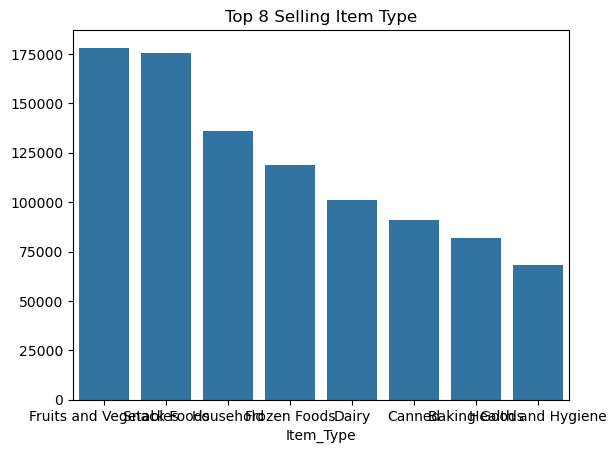

In [12]:
plot=data.groupby("Item_Type")["Item_MRP"].sum().sort_values(ascending=False)[:8]
sns.barplot(x=plot.index,y=plot.values)
plt.title("Top 8 Selling Item Type")  
# Through this plot we can see that food items are selling the most followed by household.

In [13]:
# now lets check people prefer which type of fat_content items the most
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

<Axes: ylabel='Item_Fat_Content'>

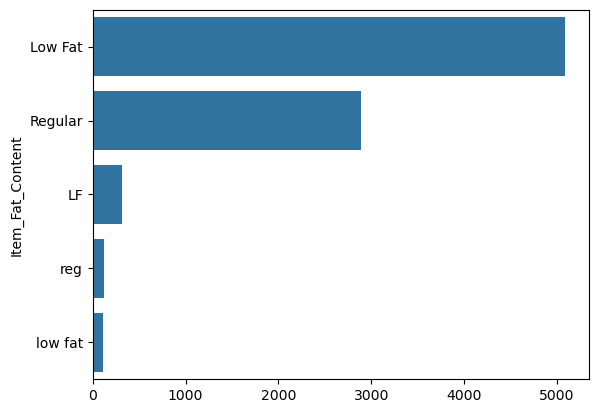

In [14]:
plot=data["Item_Fat_Content"].value_counts()
sns.barplot(x=plot.values,y=plot.index)
# through this graph we can easily see people prefer Low Fat products

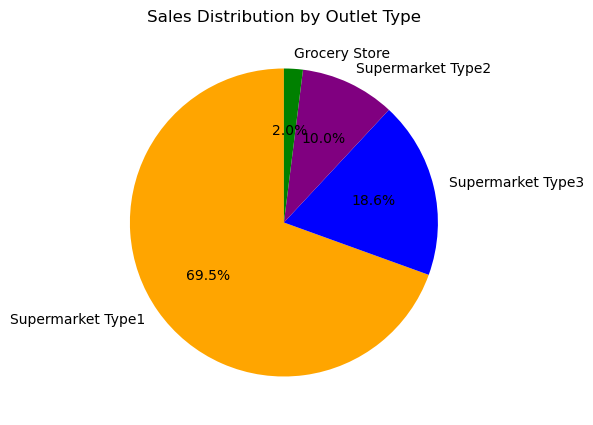

In [15]:
# now lets check which supermarket is making the most of the sales
import matplotlib.pyplot as plt

# Grouping and aggregating data
sales_data = data.groupby("Outlet_Type")["Item_Outlet_Sales"].sum().sort_values(ascending=False)

# Defining custom colors
custom_colors = ["orange", "blue", "purple","Green"]

# Creating the pie chart
plt.figure(figsize=(5, 5))  # Set the figure size
plt.pie(
    sales_data.values,  # Values for the pie chart
    labels=sales_data.index,  # Labels for each slice
    autopct="%1.1f%%",  # Display percentage with one decimal place
    startangle=90,  # Rotate the start angle
    colors=custom_colors[:len(sales_data)]  # Use custom colors
)
plt.title("Sales Distribution by Outlet Type")  # Title of the chart
plt.show()


In [16]:
# Most sold units items
data.groupby(["Item_Identifier","Item_Type","Outlet_Size"])["Unit_sold"].sum().sort_values(ascending=False)[:8]

Item_Identifier  Item_Type     Outlet_Size
FDV57            Snack Foods   Medium         133
NCO54            Household     Medium         129
FDE16            Frozen Foods  Medium         127
NCL31            Others        Medium         126
DRF36            Soft Drinks   Medium         125
FDE36            Baking Goods  Medium         125
FDR22            Snack Foods   Medium         125
FDS16            Frozen Foods  Medium         124
Name: Unit_sold, dtype: int32

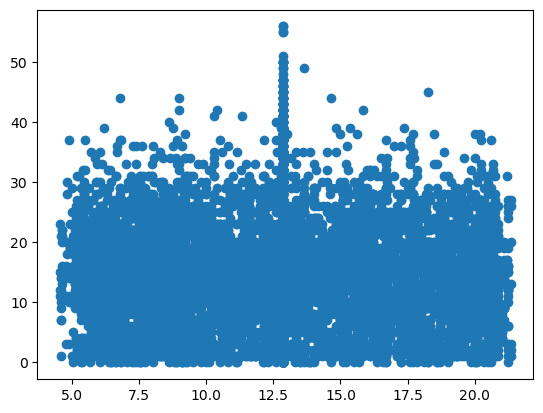

In [17]:
# checking for the linear releation ship between item_weight and unitsold
plt.scatter(data["Item_Weight"],data["Unit_sold"])

In [18]:
# now lets convert the string values to numeric value to Put them in the Machine Learning Model
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Item_Identifier'] = label_encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = label_encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = label_encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = label_encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = label_encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = label_encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = label_encoder.fit_transform(data['Outlet_Type'])

data.head(3)




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Unit_sold
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,14
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,9
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,14


In [19]:
# select the best model based on the accuracy
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import numpy as np

# Assuming 'data' is already loaded and cleaned.

# Split the data into X (features) and y (target)
X = data.drop(['Item_Outlet_Sales', "Unit_sold"], axis=1)  # Replace 'target_column' with your target variable
y = data['Item_Outlet_Sales']  # Your target variable

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling i.e normalizing the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# XGBoost Model with more parameters for better performance
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=7, 
                   subsample=0.9, colsample_bytree=0.9, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# fitting the data in the model
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Best hyperparameters found by GridSearchCV
print(f'Best parameters found: {grid_search.best_params_}')

# Train the best model
best_xgb = grid_search.best_estimator_
best_xgb.fit(x_train, y_train)

# Model Prediction
y_pred = best_xgb.predict(x_test)

# Evaluate the model using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Evaluate R² score (for regression)
r2 = best_xgb.score(x_test, y_test)
print(f'R² Score: {r2}')


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
RMSE: 1025.6629549780514
R² Score: 0.6129521402258125


In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Loading the Test Dataset
data_test = pd.read_csv(r"C:\ABB\test_AbJTz2l.csv")
data_test.head(3)

# Converting the text data into integers using LabelEncoder
label_encoder = LabelEncoder()
data_test['Item_Identifier_'] = label_encoder.fit_transform(data_test['Item_Identifier'])
data_test['Item_Fat_Content'] = label_encoder.fit_transform(data_test['Item_Fat_Content'])
data_test['Item_Type'] = label_encoder.fit_transform(data_test['Item_Type'])
data_test['Outlet_Identifier_'] = label_encoder.fit_transform(data_test['Outlet_Identifier'])
data_test['Outlet_Size'] = label_encoder.fit_transform(data_test['Outlet_Size'])
data_test['Outlet_Location_Type'] = label_encoder.fit_transform(data_test['Outlet_Location_Type'])
data_test['Outlet_Type'] = label_encoder.fit_transform(data_test['Outlet_Type'])

data_test.head(3)

# Preparing data for prediction
y_test_data = data_test.drop(["Item_Identifier", "Outlet_Identifier"], axis=1)

# Assuming `best_model` is the best model after GridSearchCV or training.
y_pred = best_xgb.predict(y_test_data)

# Creating the submission DataFrame
submission = pd.DataFrame({
    "Item_Identifier": data_test["Item_Identifier"],  # Use original Item_Identifier
    "Outlet_Identifier": data_test["Outlet_Identifier"],  # Use original Outlet_Identifier
    "Item_Outlet_Sales": y_pred.flatten()  # Flatten in case of multi-dimensional output
})

# Display the submission DataFrame
print(submission.head())


  Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0           FDW58            OUT049        3017.886963
1           FDW14            OUT017        4966.737305
2           NCN55            OUT010        4411.849121
3           FDQ58            OUT017        4557.055176
4           FDY38            OUT027        2976.836426


In [21]:
# Save the submission DataFrame to a CSV file
submission.to_csv(r"C:\Users\arpit\Downloads\submission.csv", index=False)